# Pre Processing


In [1]:
from google.colab import files
import pandas as pd
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d arjunbhasin2013/ccdata
!unzip ccdata.zip
df = pd.read_csv('CCGENERAL.csv')

print(df.head())

Saving CCGENERAL.csv to CCGENERAL.csv
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Dataset URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
License(s): CC0-1.0
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 76.4MB/s]
Archive:  ccdata.zip
  inflating: CC GENERAL.csv          
  CUST_ID      BALANCE  BALANCE_

**Data Cleaning**

Handling missing values

In [2]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [3]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-3-3e82357d3fd5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)


Seeing the distribution of MINIMUM_PAYMENTS to know which is the most appealing way to fill it

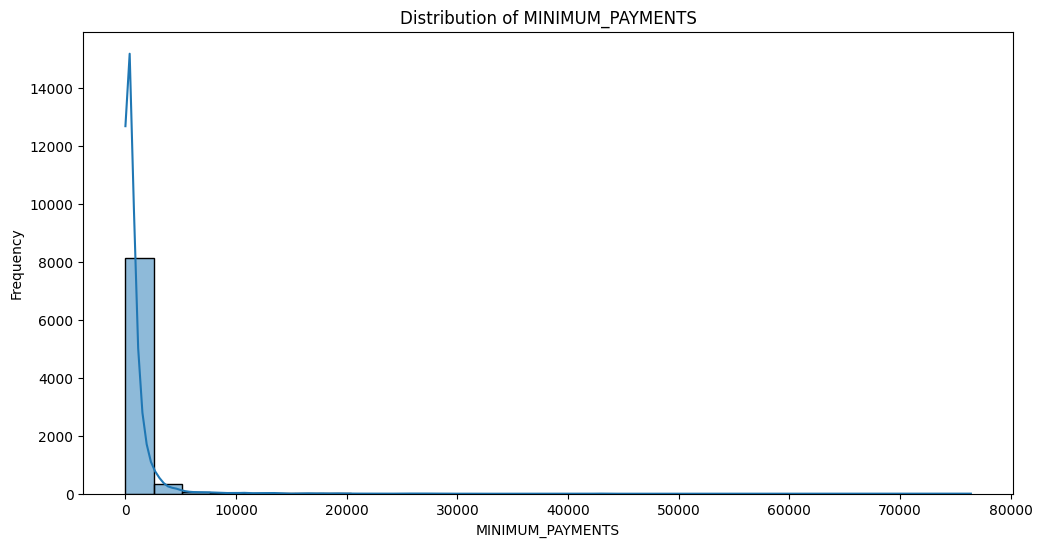

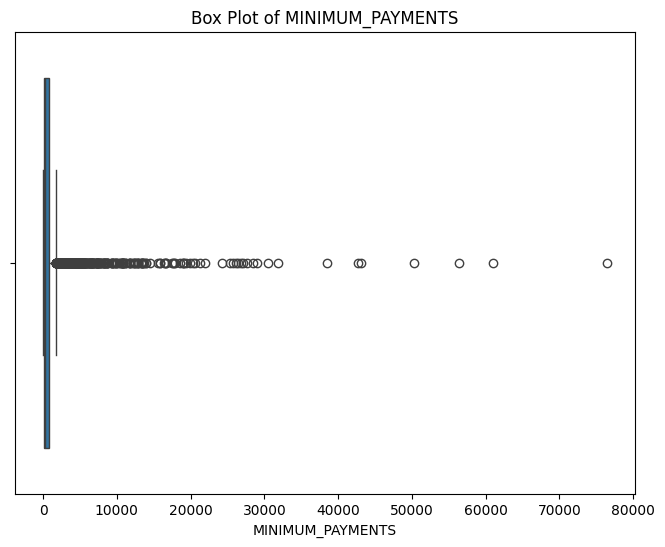

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True, bins=30)
plt.title('Distribution of MINIMUM_PAYMENTS')
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MINIMUM_PAYMENTS'])
plt.title('Box Plot of MINIMUM_PAYMENTS')
plt.xlabel('MINIMUM_PAYMENTS')
plt.show()


The visualizations for the MINIMUM_PAYMENTS indicate that the distribution is right-skewed with a few outliers. This is confirmed by the histogram and box plot showing a large concentration of values near zero, and a long tail extending towards higher values.
Given this distribution:
Median would be a better choice for filling missing values, as it is less sensitive to extreme outliers than the mean.

In [5]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-5-1002d5fedac3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [6]:
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values after imputation:
 CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Detecting the outliers of the dataset is an important step to getting a clean data to use, we will use IQR to detect outliers in the dataset

{'BALANCE': 695, 'BALANCE_FREQUENCY': 1493, 'PURCHASES': 808, 'ONEOFF_PURCHASES': 1013, 'INSTALLMENTS_PURCHASES': 867, 'CASH_ADVANCE': 1030, 'PURCHASES_FREQUENCY': 0, 'ONEOFF_PURCHASES_FREQUENCY': 782, 'PURCHASES_INSTALLMENTS_FREQUENCY': 0, 'CASH_ADVANCE_FREQUENCY': 525, 'CASH_ADVANCE_TRX': 804, 'PURCHASES_TRX': 766, 'CREDIT_LIMIT': 248, 'PAYMENTS': 808, 'MINIMUM_PAYMENTS': 909, 'PRC_FULL_PAYMENT': 1474, 'TENURE': 1366}


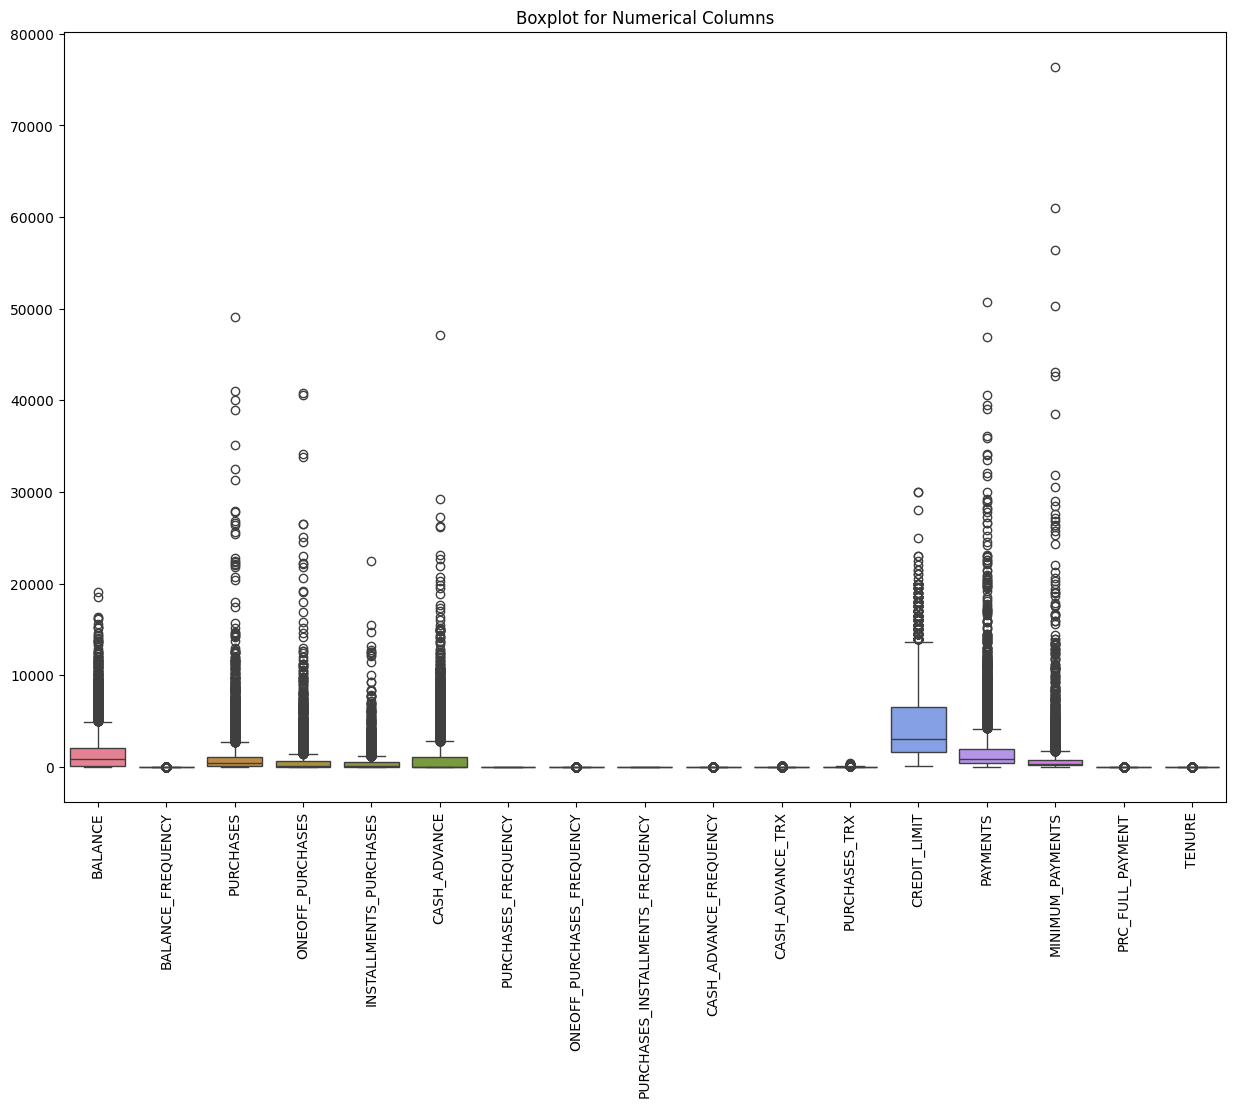

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print(outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot for Numerical Columns')
plt.xticks(rotation=90)
plt.show()

Using techniques like capping, log transformation, clipping to try to rule out very high values or outliers so it doesn't ruin the model

In [10]:
import numpy as np
columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
           'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
for col in ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']:
    df[col] = np.log1p(df[col])  # Apply log transformation

for col in ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']:
    df[col] = df[col].clip(0, 1)  # Clip values to 0 and 1 range
for col in ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(upper=None, lower=upper_bound)  # Cap extreme high values

**Checking for anomalies**

Mainly, any customer that hasn't done any payments should have a MINIMUM_PAYMENTS of 0 so let's check this

In [11]:
zero_payments = df[df['PAYMENTS'] == 0]
print(zero_payments[['PAYMENTS', 'MINIMUM_PAYMENTS']])

      PAYMENTS  MINIMUM_PAYMENTS
3          0.0          5.747301
45         0.0          5.747301
47         0.0          5.747301
55         0.0          5.747301
56         0.0          5.747301
...        ...               ...
8854       0.0          5.747301
8919       0.0          5.747301
8929       0.0          5.747301
8935       0.0          5.747301
8944       0.0          5.747301

[240 rows x 2 columns]


In [12]:
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'] = 0
# Verify the update
updated_zero_payments = df[df['PAYMENTS'] == 0]
print(updated_zero_payments[['PAYMENTS', 'MINIMUM_PAYMENTS']])

      PAYMENTS  MINIMUM_PAYMENTS
3          0.0               0.0
45         0.0               0.0
47         0.0               0.0
55         0.0               0.0
56         0.0               0.0
...        ...               ...
8854       0.0               0.0
8919       0.0               0.0
8929       0.0               0.0
8935       0.0               0.0
8944       0.0               0.0

[240 rows x 2 columns]


Also, we need to see if payments are less than minimum payments, it wouldn't make sense

In [13]:
# Find rows where PAYMENTS is less than MINIMUM_PAYMENTS
payments_less_than_minimum = df[df['PAYMENTS'] < df['MINIMUM_PAYMENTS']]

# Print the result
print(payments_less_than_minimum[['PAYMENTS', 'MINIMUM_PAYMENTS']])


      PAYMENTS  MINIMUM_PAYMENTS
2     6.434654          6.442994
5     7.244983          7.786654
10    6.988691          7.684185
14    6.692887          6.898677
15    7.598118          7.654873
...        ...               ...
8939  4.297694          4.718059
8946  5.623517          5.747301
8947  4.410016          4.423869
8948  3.980615          4.038755
8949  4.161464          4.491878

[2398 rows x 2 columns]


In [14]:
df['PAYMENTS'] = df['PAYMENTS'].round(2)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].round(2)


In [15]:
# Find rows where PAYMENTS is less than MINIMUM_PAYMENTS
payments_less_than_minimum = df[df['PAYMENTS'] < df['MINIMUM_PAYMENTS']]

# Print the result
print(payments_less_than_minimum[['PAYMENTS', 'MINIMUM_PAYMENTS']])

      PAYMENTS  MINIMUM_PAYMENTS
2         6.43              6.44
5         7.24              7.79
10        6.99              7.68
14        6.69              6.90
15        7.60              7.65
...        ...               ...
8939      4.30              4.72
8946      5.62              5.75
8947      4.41              4.42
8948      3.98              4.04
8949      4.16              4.49

[2375 rows x 2 columns]


In [16]:
threshold = 0.1
df.loc[(df['PAYMENTS'] < df['MINIMUM_PAYMENTS']) & (df['MINIMUM_PAYMENTS'] - df['PAYMENTS'] <= threshold), 'PAYMENTS'] = df['MINIMUM_PAYMENTS']
# Find rows where PAYMENTS is less than MINIMUM_PAYMENTS
payments_less_than_minimum = df[df['PAYMENTS'] < df['MINIMUM_PAYMENTS']]

# Print the result
print(payments_less_than_minimum[['PAYMENTS', 'MINIMUM_PAYMENTS']])

      PAYMENTS  MINIMUM_PAYMENTS
5         7.24              7.79
10        6.99              7.68
14        6.69              6.90
19        6.96              9.43
20        5.41              9.51
...        ...               ...
8922      4.00              4.41
8933      4.67              5.82
8939      4.30              4.72
8946      5.62              5.75
8949      4.16              4.49

[1959 rows x 2 columns]


In [17]:
df = df[df['PAYMENTS'] >= df['MINIMUM_PAYMENTS']]
# Find rows where PAYMENTS is less than MINIMUM_PAYMENTS
payments_less_than_minimum = df[df['PAYMENTS'] < df['MINIMUM_PAYMENTS']]

# Print the result
print(payments_less_than_minimum[['PAYMENTS', 'MINIMUM_PAYMENTS']])

Empty DataFrame
Columns: [PAYMENTS, MINIMUM_PAYMENTS]
Index: []


{'BALANCE': 67, 'BALANCE_FREQUENCY': 843, 'PURCHASES': 745, 'ONEOFF_PURCHASES': 928, 'INSTALLMENTS_PURCHASES': 766, 'CASH_ADVANCE': 761, 'PURCHASES_FREQUENCY': 0, 'ONEOFF_PURCHASES_FREQUENCY': 726, 'PURCHASES_INSTALLMENTS_FREQUENCY': 0, 'CASH_ADVANCE_FREQUENCY': 593, 'CASH_ADVANCE_TRX': 871, 'PURCHASES_TRX': 535, 'CREDIT_LIMIT': 6, 'PAYMENTS': 277, 'MINIMUM_PAYMENTS': 377, 'PRC_FULL_PAYMENT': 990, 'TENURE': 963}


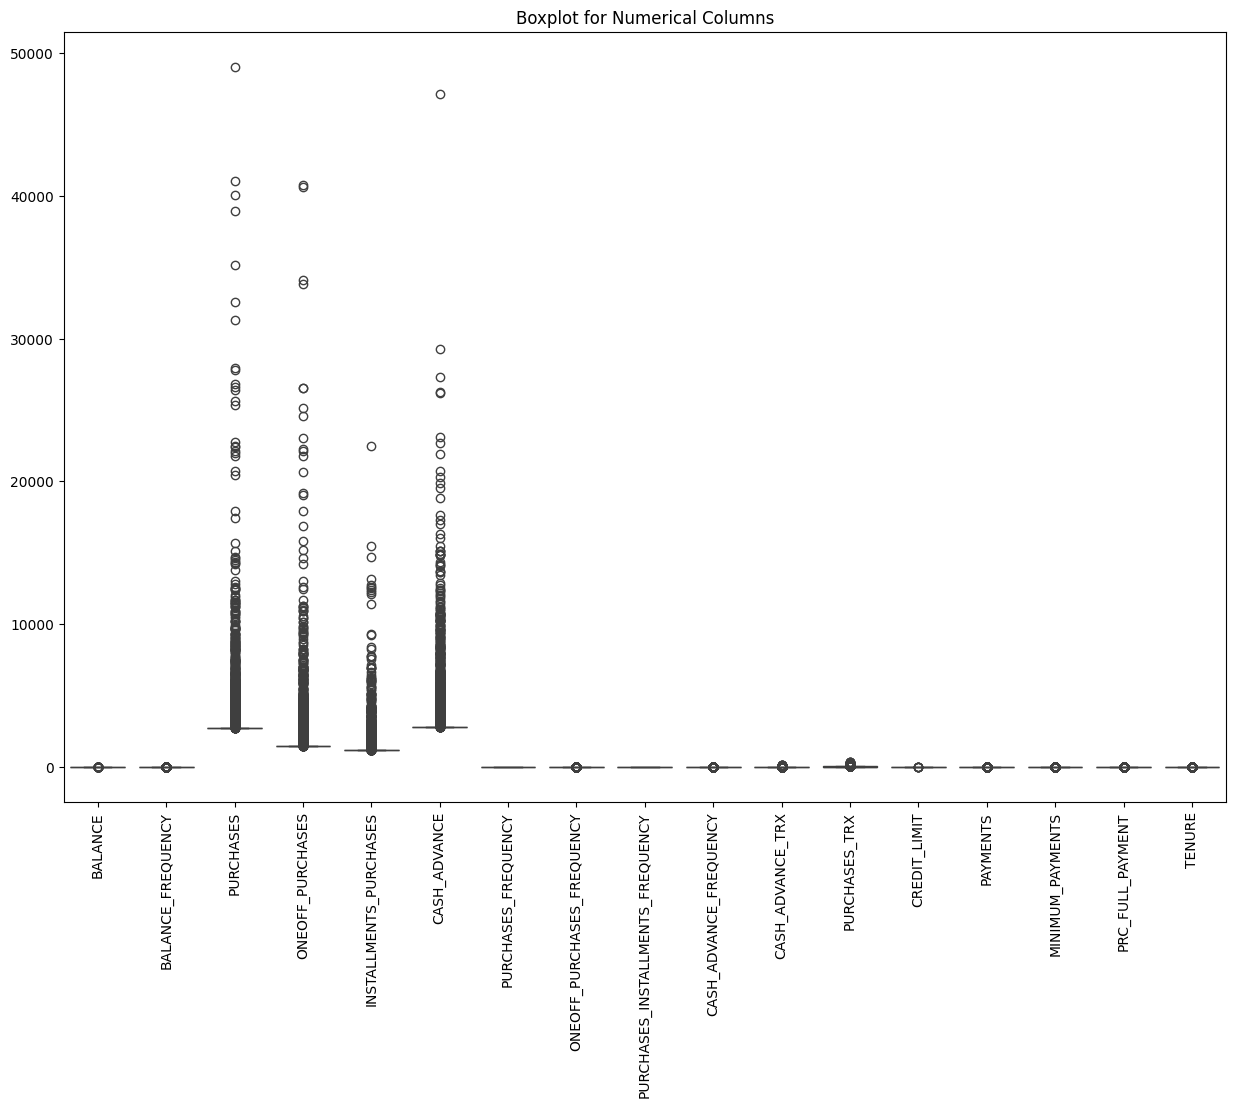

In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

# Display outliers per column
print(outliers)
# Boxplot to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot for Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [19]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,3.735304,0.818182,2715.8725,1443.5125,1171.59375,2784.552848,0.166667,0.000000,0.083333,0.000000,0,2,6.908755,5.31,4.95,0.000000,12
1,C10002,8.071989,0.909091,2715.8725,1443.5125,1171.59375,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,8.853808,8.32,6.98,0.222222,12
2,C10003,7.822504,1.000000,2715.8725,1443.5125,1171.59375,2784.552848,1.000000,1.000000,0.000000,0.000000,0,12,8.922792,6.44,6.44,0.000000,12
3,C10004,7.419183,0.636364,2715.8725,1499.0000,1171.59375,2784.552848,0.083333,0.083333,0.000000,0.083333,1,1,8.922792,0.00,0.00,0.000000,12
4,C10005,6.707735,1.000000,2715.8725,1443.5125,1171.59375,2784.552848,0.083333,0.083333,0.000000,0.000000,0,1,7.090910,6.52,5.50,0.000000,12


**Normalization**

It can be done through many ways , I tried standard scaling but it didn't act very well so I chose maxmin scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df[numerical_cols])

# Check the transformed data
print("Min-Max Scaled Data (first 5 rows):")
print(df_scaled[:5])

Min-Max Scaled Data (first 5 rows):
[[0.37904492 0.818182   0.         0.         0.         0.
  0.166667   0.         0.083333   0.         0.         0.00558659
  0.46681108 0.49030471 0.49698795 0.         1.        ]
 [0.81911584 0.909091   0.         0.         0.         0.08248418
  0.         0.         0.         0.25       0.03252033 0.
  0.77181416 0.76823638 0.70080321 0.222222   1.        ]
 [0.79379905 1.         0.         0.         0.         0.
  1.         1.         0.         0.         0.         0.03351955
  0.78263141 0.59464451 0.64658635 0.         1.        ]
 [0.75287148 0.636364   0.         0.00141126 0.         0.
  0.083333   0.083333   0.         0.083333   0.00813008 0.0027933
  0.78263141 0.         0.         0.         1.        ]
 [0.68067637 1.         0.         0.         0.         0.
  0.083333   0.083333   0.         0.         0.         0.0027933
  0.49537475 0.60203139 0.55220884 0.         1.        ]]


Applying PCA reduction to the dataset

In [21]:
# Step 1: PCA for Preprocessed Data
from sklearn.decomposition import PCA

# Retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
df_pca_processed = pca.fit_transform(df_scaled)

# Print number of components retained
print(f"PCA reduced the dataset to {pca.n_components_} components.")

# Create a new dataframe for PCA-processed data
pca_columns = [f'PCA_{i+1}' for i in range(pca.n_components_)]
df_pca_processed = pd.DataFrame(df_pca_processed, columns=pca_columns)

PCA reduced the dataset to 8 components.


In [22]:
# Step 2: Apply Min-Max Scaling to PCA-Processed Data
min_max_scaler = MinMaxScaler()
df_pca_processed = min_max_scaler.fit_transform(df_pca_processed)

# Create a new DataFrame for Min-Max Scaled PCA data
df_pca_processed = pd.DataFrame(df_pca_processed, columns=pca_columns)

# Print the first few rows of the scaled PCA data
print("Min-Max Scaled PCA Data (first 5 rows):")
print(df_pca_processed.head())


Min-Max Scaled PCA Data (first 5 rows):
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  0.160348  0.432778  0.311396  0.457116  0.894366  0.736670  0.352026   
1  0.107621  0.599933  0.377623  0.722368  0.886340  0.548647  0.277865   
2  0.541986  0.797570  0.692643  0.293839  0.811165  0.688732  0.338611   
3  0.088358  0.416166  0.357528  0.330940  0.827577  0.731407  0.566165   
4  0.132057  0.573356  0.347737  0.538548  0.891119  0.784321  0.300178   

      PCA_8  
0  0.348897  
1  0.549969  
2  0.435168  
3  0.931896  
4  0.414187  


# Modeling

**K-Means Clustering**

Inertia values for different k (Original Data):
k=1: Inertia=5460.444090629112
k=2: Inertia=3543.09370833345
k=3: Inertia=3019.176445322998
k=4: Inertia=2562.391771458475
k=5: Inertia=2298.3161400483264
k=6: Inertia=2131.473034483162
k=7: Inertia=1977.9568196550529
k=8: Inertia=1863.78365576151
k=9: Inertia=1770.1542462984105
k=10: Inertia=1675.224418315074


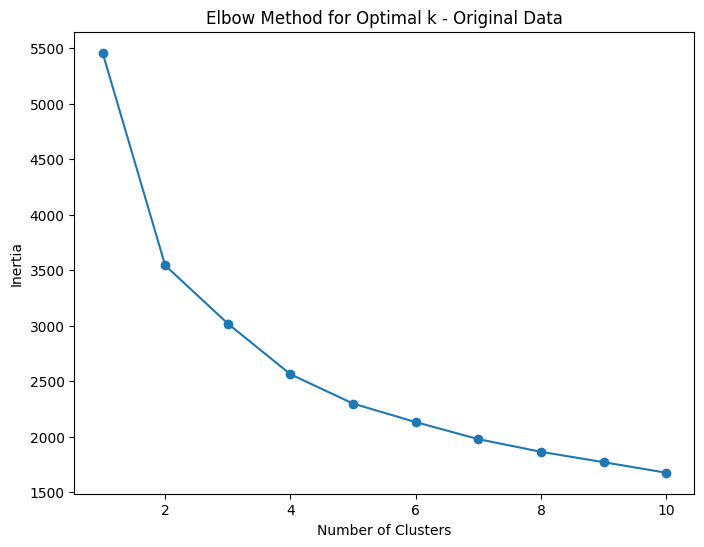

Inertia values for different k (PCA Processed Data):
k=1: Inertia=1445.5851881465032
k=2: Inertia=1018.9114055571553
k=3: Inertia=877.2094136170285
k=4: Inertia=767.540297088084
k=5: Inertia=688.2955284379422
k=6: Inertia=650.2041877566064
k=7: Inertia=589.0424292480237
k=8: Inertia=547.3800926089497
k=9: Inertia=520.9601151171494
k=10: Inertia=485.27562077882277


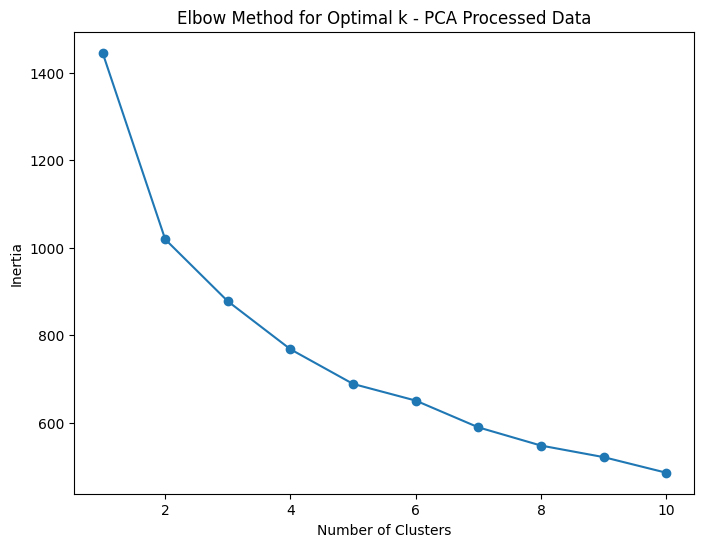

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Original data elbow method
inertia_original = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_original.append(kmeans.inertia_)

# Print inertia values for original data
print("Inertia values for different k (Original Data):")
for k, value in enumerate(inertia_original, start=1):
    print(f"k={k}: Inertia={value}")

# Plot the Elbow curve for original data
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_original, marker='o')
plt.title('Elbow Method for Optimal k - Original Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

inertia_pca = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_processed)
    inertia_pca.append(kmeans.inertia_)

# Print inertia values for PCA-processed data
print("Inertia values for different k (PCA Processed Data):")
for k, value in enumerate(inertia_pca, start=1):
    print(f"k={k}: Inertia={value}")

# Plot the Elbow curve for PCA-processed data
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.title('Elbow Method for Optimal k - PCA Processed Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
# Apply KMeans clustering to the original data
kmeans_original = KMeans(n_clusters=6, random_state=42)
df['Cluster_Original'] = kmeans_original.fit_predict(df_scaled)

# Apply KMeans clustering to the PCA-processed data
kmeans_pca = KMeans(n_clusters=6, random_state=42)
df_pca_processed['Cluster_PCA'] = kmeans_pca.fit_predict(df_pca_processed)


Visualization

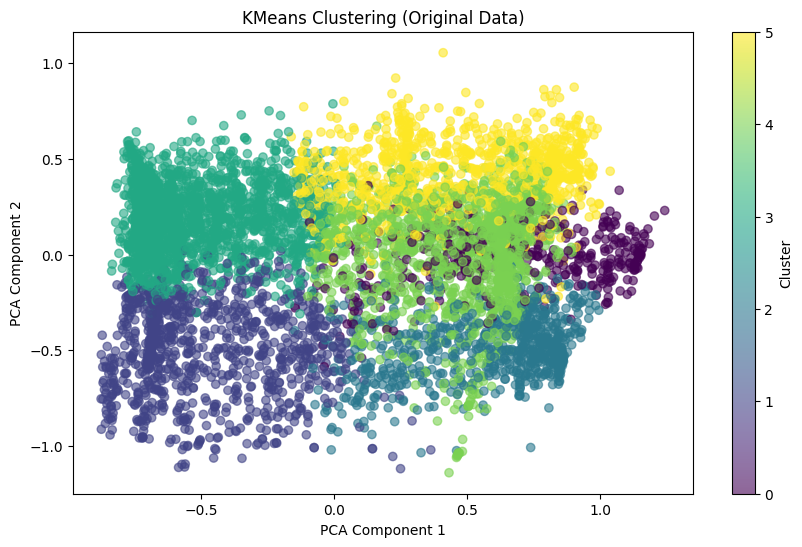

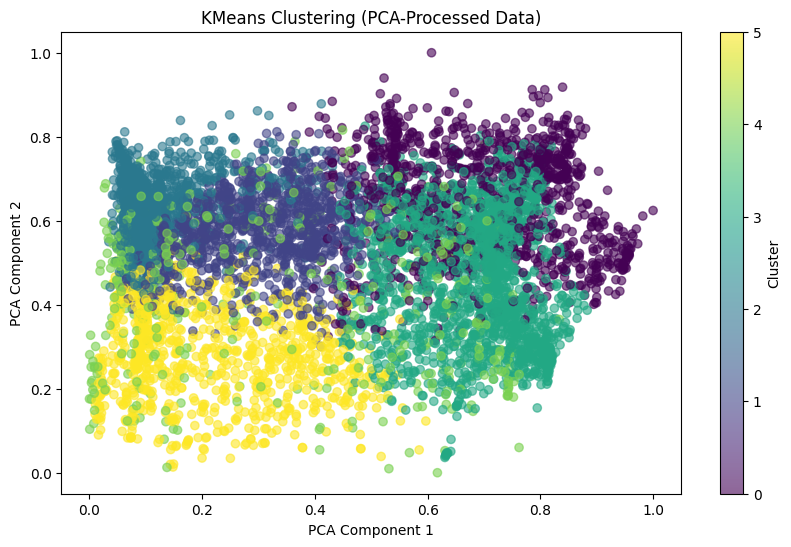

In [26]:
pca_2d = PCA(n_components=2, random_state=42)
df_pca_2d = pca_2d.fit_transform(df_scaled)

# Scatter plot for original data
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=df['Cluster_Original'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering (Original Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for PCA-processed data
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_processed.iloc[:, 0], df_pca_processed.iloc[:, 1], c=df_pca_processed['Cluster_PCA'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering (PCA-Processed Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


Evaluating the method through 2 techniques , Dunn Index and Silhouette score

In [27]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for KMeans Clustering on Original Data
silhouette_original = silhouette_score(df_scaled, df['Cluster_Original'])
print(f"Silhouette Score for KMeans Clustering (Original Data): {silhouette_original}")

# Calculate Silhouette Score for KMeans Clustering on PCA-Processed Data
silhouette_pca = silhouette_score(df_pca_processed, df_pca_processed['Cluster_PCA'])
print(f"Silhouette Score for KMeans Clustering (PCA-Processed Data): {silhouette_pca}")


Silhouette Score for KMeans Clustering (Original Data): 0.2855606422462888
Silhouette Score for KMeans Clustering (PCA-Processed Data): 0.6686135926507235


In [28]:
# Evaluate Clustering Using Dunn Index
from scipy.spatial.distance import cdist
import numpy as np

def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    # Calculate inter-cluster distances (min distance between clusters)
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            cluster_i = data[labels == unique_clusters[i]]
            cluster_j = data[labels == unique_clusters[j]]
            distances = cdist(cluster_i, cluster_j, metric='euclidean')
            inter_cluster_distances.append(np.min(distances))

    # Calculate intra-cluster distances (max pairwise distance within a cluster)
    for cluster in unique_clusters:
        cluster_data = data[labels == cluster]
        distances = cdist(cluster_data, cluster_data, metric='euclidean')
        intra_cluster_distances.append(np.max(distances))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Dunn index for original data
dunn_original = dunn_index(df_scaled, df['Cluster_Original'].to_numpy())
print(f"Dunn Index for Original Data Clustering: {dunn_original}")

# Dunn index for PCA-processed data
dunn_pca = dunn_index(df_pca_processed.iloc[:, :-1].to_numpy(), df_pca_processed['Cluster_PCA'].to_numpy())
print(f"Dunn Index for PCA-Processed Data Clustering: {dunn_pca}")

Dunn Index for Original Data Clustering: 0.01979206172685071
Dunn Index for PCA-Processed Data Clustering: 0.012402373204671793


**Important**

I used different K cluster and these are the dunn indexes for all of them:
K = 3 : Dunn Index for Original Data Clustering: 0.005210134575082188
Dunn Index for PCA-Processed Data Clustering: 0.0037815689353751666
K = 4 : Dunn Index for Original Data Clustering: 0.006909151145939363
Dunn Index for PCA-Processed Data Clustering: 0.004918091817031047
K = 5 : Dunn Index for Original Data Clustering: 0.008434474333619038
Dunn Index for PCA-Processed Data Clustering: 0.004016429265834674
K = 6 : Dunn Index for Original Data Clustering: 0.007605201959736129
Dunn Index for PCA-Processed Data Clustering: 0.004016429265834674

**So I decided that choosing K = 5 for the original data , and K = 4 for PCA would be the best choice.**

**But based on elbow method 3 should be optimum**


**Hierarchical clustering**

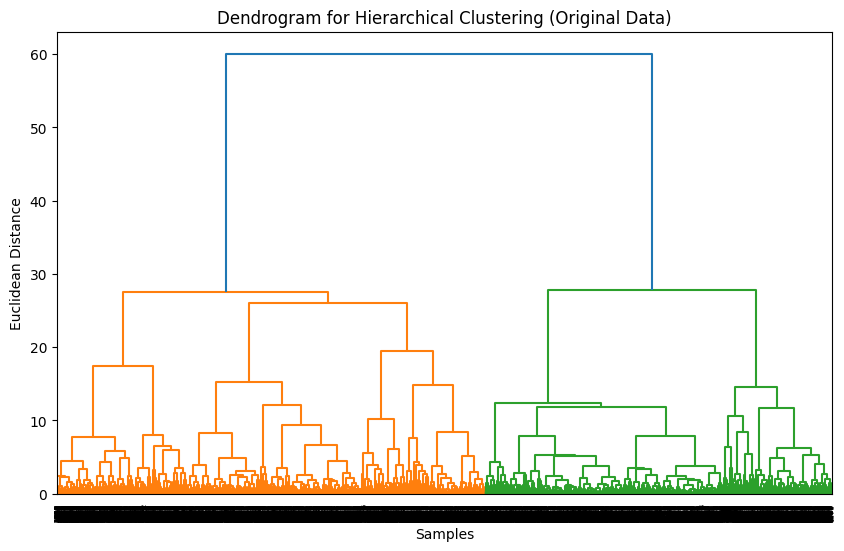

   Cluster_Hierarchical_Original
0                              2
1                              2
2                              0
3                              1
4                              2


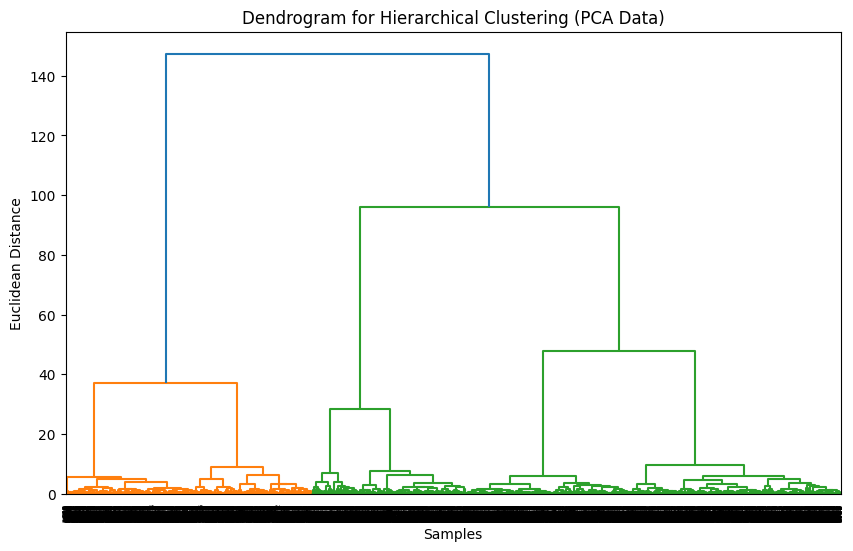

   Cluster_Hierarchical_PCA
0                         1
1                         0
2                         1
3                         1
4                         1


In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

linkage_matrix_original = sch.linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix_original)
plt.title('Dendrogram for Hierarchical Clustering (Original Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

agg_clustering_original = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster_Hierarchical_Original'] = agg_clustering_original.fit_predict(df_scaled)

print(df[['Cluster_Hierarchical_Original']].head())

linkage_matrix_pca = sch.linkage(df_pca_processed, method='ward')

plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix_pca)
plt.title('Dendrogram for Hierarchical Clustering (PCA Data)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()
agg_clustering_pca = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_pca_processed['Cluster_Hierarchical_PCA'] = agg_clustering_pca.fit_predict(df_pca_processed)
print(df_pca_processed[['Cluster_Hierarchical_PCA']].head())


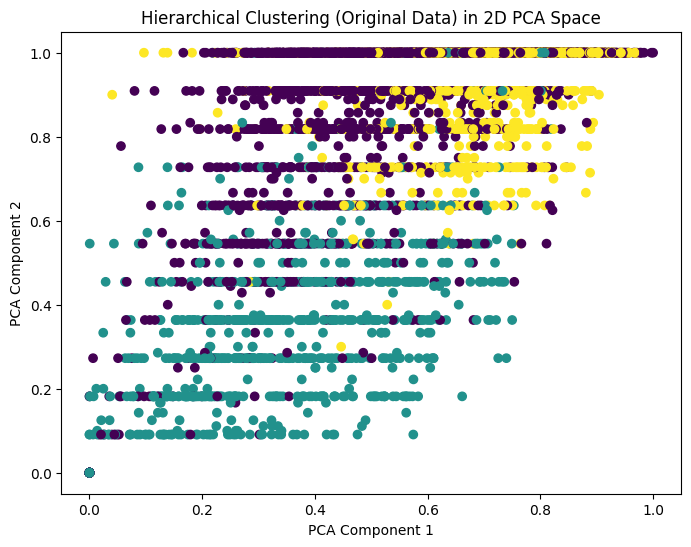

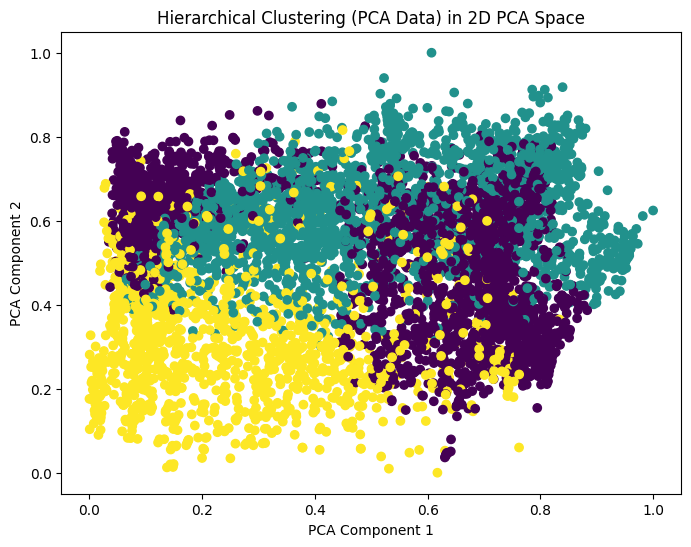

In [30]:
import matplotlib.pyplot as plt

# Visualizing Clusters for Original Data (in 2D PCA space)
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster_Hierarchical_Original'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering (Original Data) in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualizing Clusters for PCA-processed Data (in 2D PCA space)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_processed.iloc[:, 0], df_pca_processed.iloc[:, 1], c=df_pca_processed['Cluster_Hierarchical_PCA'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering (PCA Data) in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [31]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Hierarchical Clustering on Original Data
silhouette_hierarchical_original = silhouette_score(df_scaled, df['Cluster_Hierarchical_Original'])
print(f"Silhouette Score for Hierarchical Clustering (Original Data): {silhouette_hierarchical_original}")

# Calculate Silhouette Score for Hierarchical Clustering on PCA-Processed Data
silhouette_hierarchical_pca = silhouette_score(df_pca_processed, df_pca_processed['Cluster_Hierarchical_PCA'])
print(f"Silhouette Score for Hierarchical Clustering (PCA-Processed Data): {silhouette_hierarchical_pca}")


Silhouette Score for Hierarchical Clustering (Original Data): 0.26404024724195896
Silhouette Score for Hierarchical Clustering (PCA-Processed Data): 0.6702437613188009


In [32]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist

# Dunn Index Calculation Function
def dunn_index(X, labels):
    # Calculate the pairwise distances between points
    pairwise_dist = pairwise_distances(X)

    # Calculate intra-cluster distance (maximum distance within a cluster)
    intra_cluster_distances = []
    for cluster in np.unique(labels):
        cluster_points = X[labels == cluster]
        dist_matrix = cdist(cluster_points, cluster_points, metric='euclidean')
        intra_cluster_distances.append(np.max(dist_matrix))  # Maximum within-cluster distance

    # Calculate inter-cluster distance (minimum distance between clusters)
    inter_cluster_distances = []
    for i in range(len(np.unique(labels))):
        for j in range(i + 1, len(np.unique(labels))):
            cluster_i = X[labels == i]
            cluster_j = X[labels == j]
            dist_matrix = cdist(cluster_i, cluster_j, metric='euclidean')
            inter_cluster_distances.append(np.min(dist_matrix))  # Minimum between-cluster distance

    # Dunn index is the ratio of min inter-cluster distance to max intra-cluster distance
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Dunn Index Evaluation for Original Data
dunn_original = dunn_index(df_scaled, df['Cluster_Hierarchical_Original'])
print(f"Dunn Index for Hierarchical Clustering (Original Data): {dunn_original}")

# Dunn Index Evaluation for PCA-processed Data
dunn_pca = dunn_index(df_pca_processed, df_pca_processed['Cluster_Hierarchical_PCA'])
print(f"Dunn Index for Hierarchical Clustering (PCA Data): {dunn_pca}")


Dunn Index for Hierarchical Clustering (Original Data): 0.036980658549967786
Dunn Index for Hierarchical Clustering (PCA Data): 0.8041499671111417


**Spectral clustering**

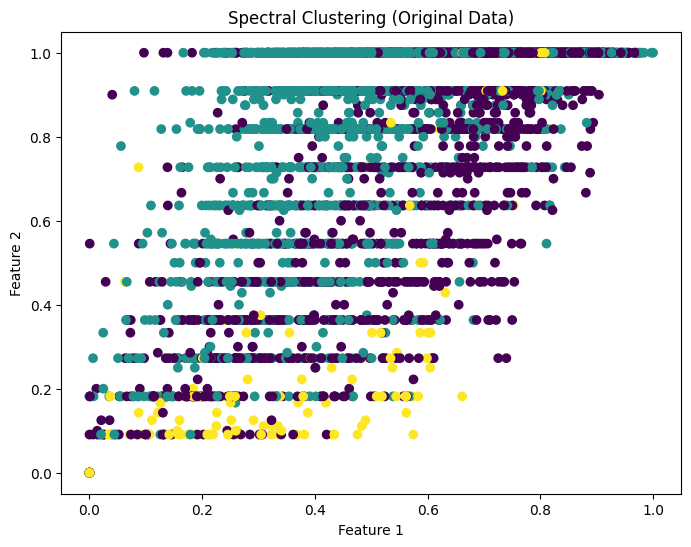

   Cluster_Spectral_Original
0                          0
1                          0
2                          1
3                          2
4                          0


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


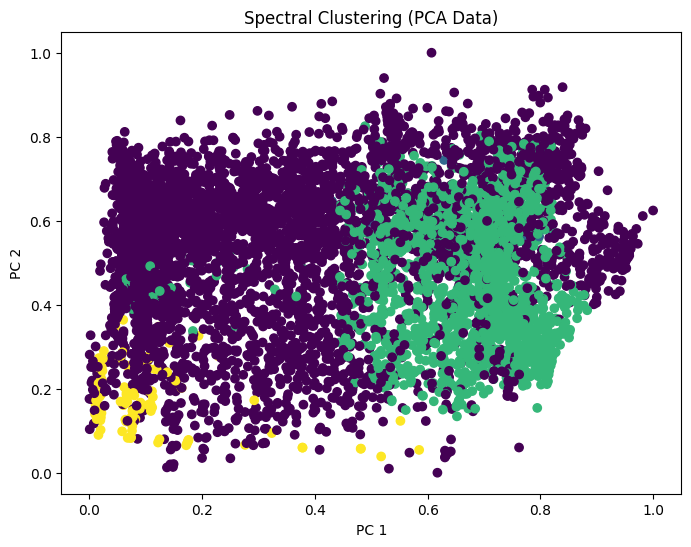

   Cluster_Spectral_PCA
0                     0
1                     0
2                     0
3                     2
4                     0


In [33]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

spectral_clustering_original = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df['Cluster_Spectral_Original'] = spectral_clustering_original.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster_Spectral_Original'], cmap='viridis')
plt.title('Spectral Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(df[['Cluster_Spectral_Original']].head())


spectral_clustering_pca = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
df_pca_processed['Cluster_Spectral_PCA'] = spectral_clustering_pca.fit_predict(df_pca_processed)


plt.figure(figsize=(8, 6))
plt.scatter(df_pca_processed.iloc[:, 0], df_pca_processed.iloc[:, 1], c=df_pca_processed['Cluster_Spectral_PCA'], cmap='viridis')
plt.title('Spectral Clustering (PCA Data)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

print(df_pca_processed[['Cluster_Spectral_PCA']].head())


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


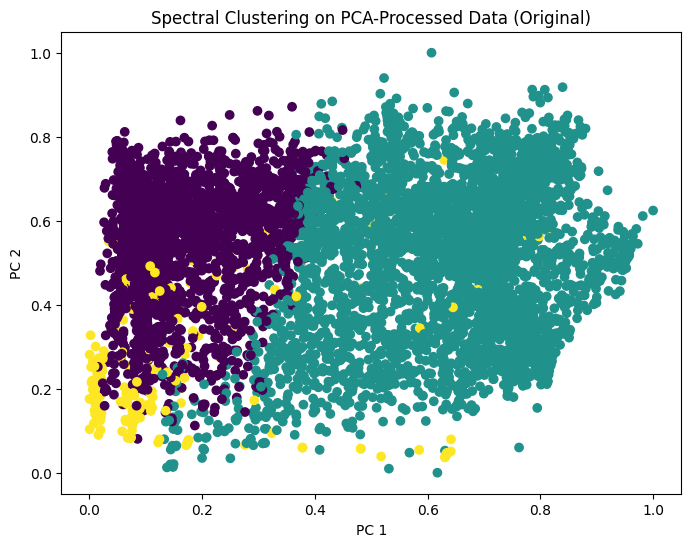

Dunn Index for Spectral Clustering (Original Data): 0.033658420390290544


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


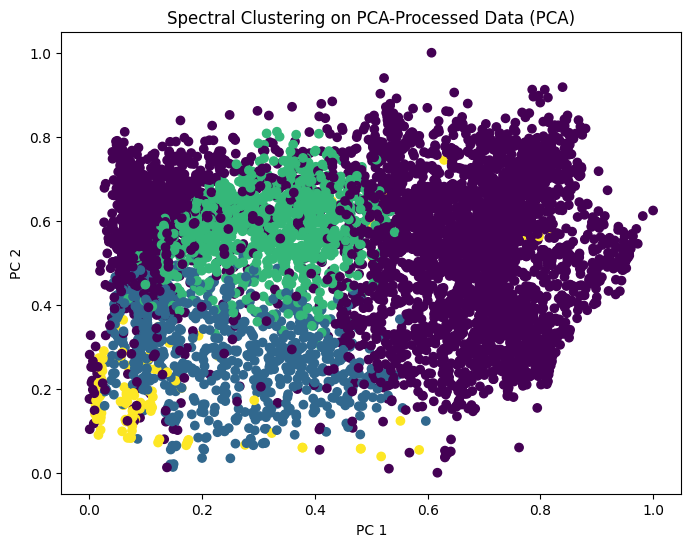

Dunn Index for Spectral Clustering (PCA Data): 0.2728215526065154


In [34]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

n_neighbors = 10  # Define the number of neighbors for k-NN
affinity_matrix_original = kneighbors_graph(df_scaled, n_neighbors=n_neighbors, include_self=False, mode='connectivity')

spectral_clustering_original_knn = SpectralClustering(
    n_clusters=3,
    affinity='precomputed',
    random_state=42
)
df['Cluster_Spectral_Original'] = spectral_clustering_original_knn.fit_predict(affinity_matrix_original.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_processed.iloc[:, 0], df_pca_processed.iloc[:, 1], c=df['Cluster_Spectral_Original'], cmap='viridis')
plt.title('Spectral Clustering on PCA-Processed Data (Original)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

dunn_spectral_original = dunn_index(df_scaled, df['Cluster_Spectral_Original'])
print(f"Dunn Index for Spectral Clustering (Original Data): {dunn_spectral_original}")


affinity_matrix_pca = kneighbors_graph(df_pca_processed, n_neighbors=n_neighbors, include_self=False, mode='connectivity')

spectral_clustering_pca_knn = SpectralClustering(
    n_clusters=4,
    affinity='precomputed',
    random_state=42
)
df_pca_processed['Cluster_Spectral_PCA'] = spectral_clustering_pca_knn.fit_predict(affinity_matrix_pca.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_processed.iloc[:, 0], df_pca_processed.iloc[:, 1], c=df_pca_processed['Cluster_Spectral_PCA'], cmap='viridis')
plt.title('Spectral Clustering on PCA-Processed Data (PCA)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

dunn_spectral_pca = dunn_index(df_pca_processed, df_pca_processed['Cluster_Spectral_PCA'])
print(f"Dunn Index for Spectral Clustering (PCA Data): {dunn_spectral_pca}")


In [35]:
# For Original Data
silhouette_spectral_original = silhouette_score(df_scaled, df['Cluster_Spectral_Original'])
print(f"Silhouette Score for Spectral Clustering (Original Data): {silhouette_spectral_original}")

# For PCA-Processed Data
silhouette_spectral_pca = silhouette_score(df_pca_processed.values, df_pca_processed['Cluster_Spectral_PCA'])
print(f"Silhouette Score for Spectral Clustering (PCA Data): {silhouette_spectral_pca}")


Silhouette Score for Spectral Clustering (Original Data): 0.29973259701928867
Silhouette Score for Spectral Clustering (PCA Data): 0.4583781485308353
